# Error surface
# Linear regression

Plot cost function $J=\frac{1}{2}(y - h)^2$ for:
- linear regression 2 samples (cost is a $\sum{}$) no hidden layers
- linear regression 1 hidden layer and 1 sample

Also plots two samples ("training cases") and _superposition_ (in 2nd case) of two activation functions.

Each sample is plotted as $y = ax^2 + bx + c$.

_Superposition_ is :

$y_1 = a_1 x^2 + b_1 x + c_1$

$y_2 = a_2 y_{1}^2 + b_2 y_1 + c_2$

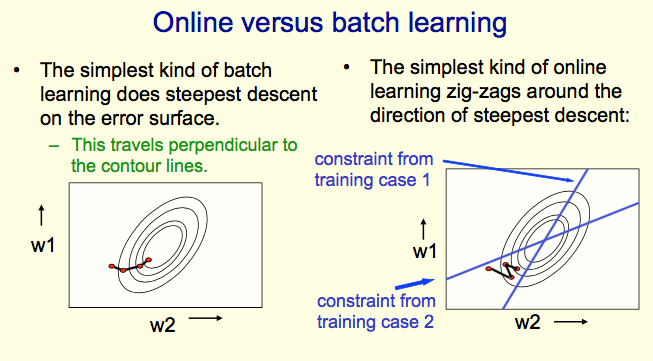


In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

## Linear regression. One sample.

$$ h = ax + b $$
$$
J = \frac{1}{2}(y - h)^2
$$

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [14]:
def plot(a1,b1,c1,a2,b2,c2):
    fig = plt.figure(figsize=plt.figaspect(.3))
    
    
    # Make data.
    X = np.arange(-50, 50, 1)
    Y = np.arange(-150, 150, 1)
    X, Y = np.meshgrid(X, Y)
    
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    J1 = ((Y-(a1*X**2+b1*X+c1))**2)/2
    ax0.plot_surface(X,Y,J1, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
   # ax.zaxis.set_major_locator(LinearLocator(10))
   # ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax0.set_ylabel("Y")
    ax0.set_title("$"+str(a1)+"x^2+"+str(b1)+"x+"+str(c1)+"$")
    
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    J2 = ((Y-(a2*X**2+b2*X+c2))**2)/2
    ax1.plot_surface(X,Y,J2, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
   # ax.zaxis.set_major_locator(LinearLocator(10))
   # ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax1.set_ylabel("Y")
    ax1.set_title("$"+str(a2)+"x^2+"+str(b2)+"x+"+str(c2)+"$")
    
    
    # fig.colorbar(surf,shrink=0.5, aspect=5)
    plt.show()

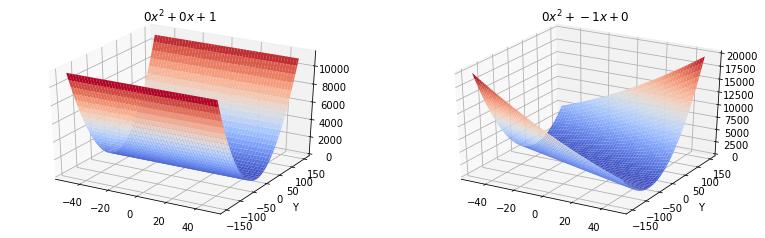

In [15]:
plot(0,0,1,0,-1,0)

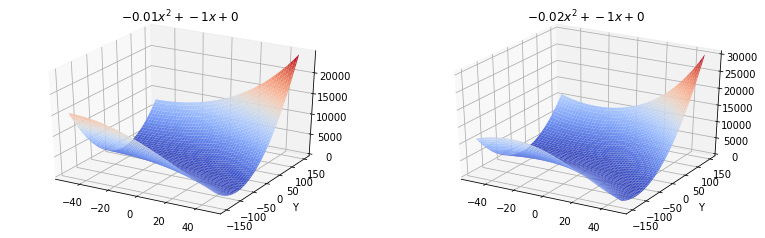

In [16]:
plot(-0.01,-1,0,-0.02,-1,0)

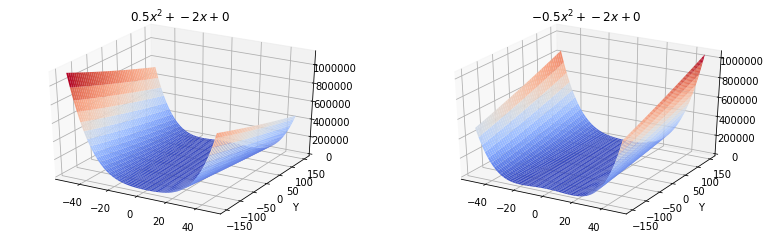

In [19]:
plot(.5,-2,0,-.5,-2,0)

## Linear regression. Two samples.

Cost function is a sum of costs functions of each sample.
This test simulates NN with no hidden layers, linear activation and 2 samples.

In [20]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [86]:
def plot2_add(y1, y2):
    x = np.arange(-10, 10, 0.5)
    y = np.arange(-50, 50, 1)
    X, Y = np.meshgrid(x, y)
    J = ((Y-y1(X))**2)/2+((Y-y2(X))**2)/2
    fig = plt.figure(figsize=(20,10))
    levels = MaxNLocator(nbins=15).tick_values(J.min(), J.max())
    
    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('coolwarm')
        
    ax0 = fig.add_subplot(1, 2, 1)
    ax0.contourf(x, y, J, cmap=cmap, levels=levels)
    ax0.set_ylim(-50,50)
    ax0.set_ylabel("Y")
    
    # draw lines
    y_ = y1(x)
    ax0.plot(x,y_,'b--',label="y1")
    
    # draw lines
    y_ = y2(x)
    ax0.plot(x,y_,'r--',label="y2")
    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    

    ax1 = fig.add_subplot(1, 2, 2, projection='3d')    
    ax1.plot_surface(X,Y,J, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
    ax1.set_ylabel("Y")
       
    fig.tight_layout()
    plt.show()

### Non-convex cost function

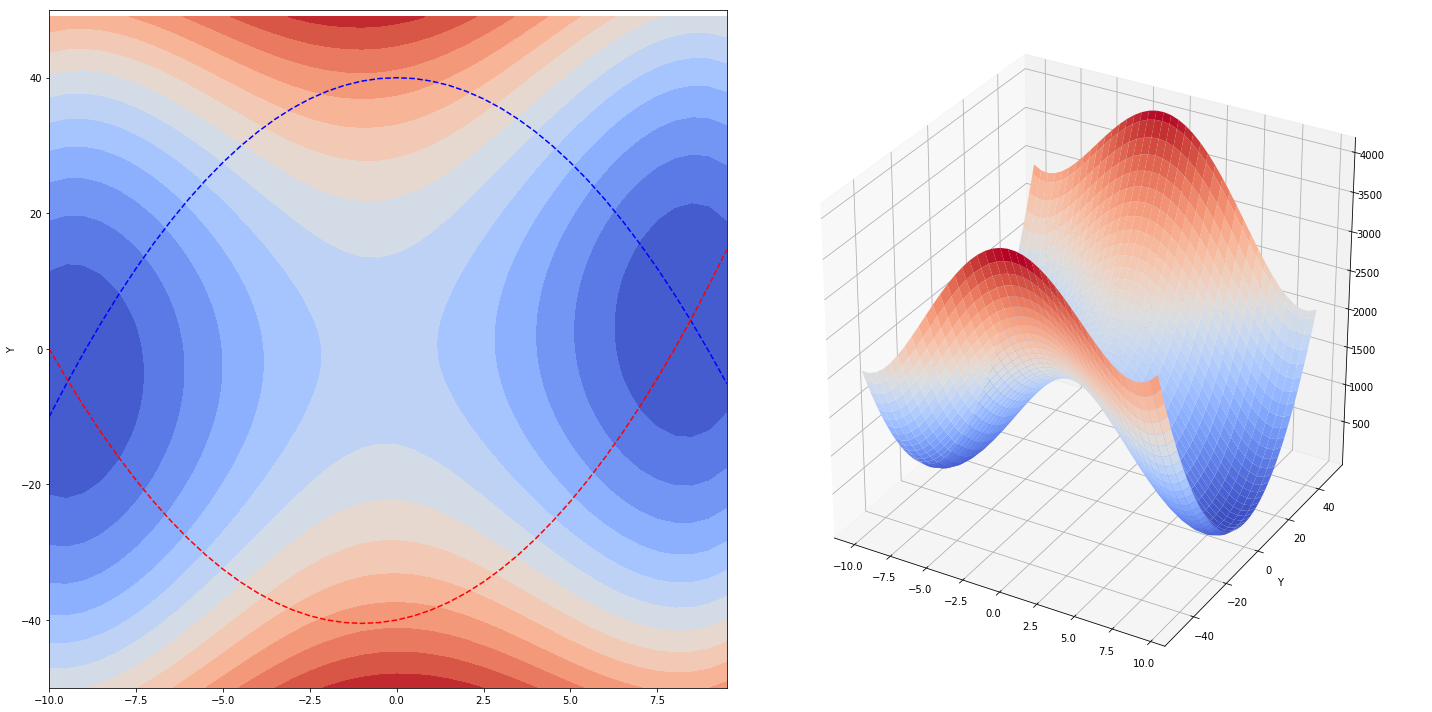

In [87]:
def y1(x):
    a1 = -.5    
    b1 = 0
    c1 = 40
    r = a1*x**2  + b1*x + c1    
    return r

def y2(x):
    a2 = .5
    b2 = 1
    c2 = -40
    r = a2*x**2 + b2*x + c2    
    return r

plot2_add(y1,y2)

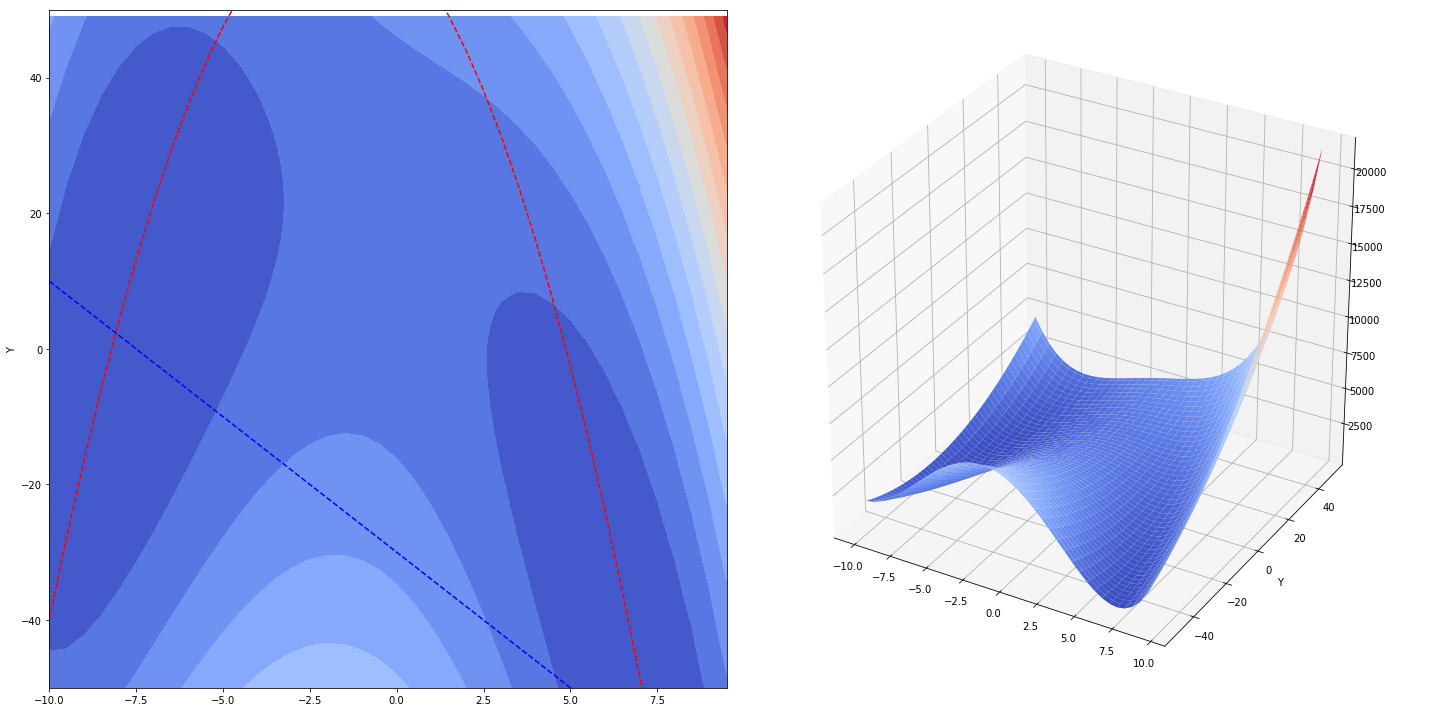

In [88]:
def y1(x):
    a1 = 0    
    b1 = -4
    c1 = -30
    r = a1*x**2  + b1*x + c1    
    return r

def y2(x):
    a2 = -1.5
    b2 = -5
    c2 = 60
    r = a2*x**2 + b2*x + c2    
    return r

plot2_add(y1,y2)

## Linear regression. 2 levels. 1 sample.

Cost function is a superposition of costs functions of two layers (for one sample). This test simulates NN with 1 hidden layer, linear activation and 1 sample.

In [89]:
def plot2_superp(y1, y2, title):

    xlim = 10
    ylim = 50    
    x = np.arange(-1*xlim, xlim, 0.5)
    y = np.arange(-1*ylim, ylim, 1)
    X, Y = np.meshgrid(x, y)
    J = ((Y-y2(y1(X)))**2)/2
    fig = plt.figure(figsize=(20,10))
    levels = MaxNLocator(nbins=15).tick_values(J.min(), J.max())
    
    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('coolwarm')
        
    ax0 = fig.add_subplot(1, 2, 1)
    ax0.contourf(x, y, J, cmap=cmap, levels=levels)
    #ax0.colorbar(im)
    
    # draw lines
    y_ = y1(x)
    ax0.plot(x,y_,'b--',label="y1")
    
    # draw lines
    y_ = y2(x)
    ax0.plot(x,y_,'y-.',label="y2")
    
    # draw lines
    y_2 = y2(y1(x))
    ax0.plot(x,y_2,'r-',label="y2")
    ax0.set_ylim(-1*ylim, ylim)
    ax0.set_xlim(-1*xlim, xlim)
    ax0.set_ylabel("Y")
    
    fontdic = {
        'fontsize': 18
    }
    ax0.set_title(title, fontdict=fontdic)
    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    ax1.plot_surface(X,Y,J, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
    ax1.set_ylabel("Y")
       
    
    # fig.colorbar(surf,shrink=0.5, aspect=5)
    plt.show()

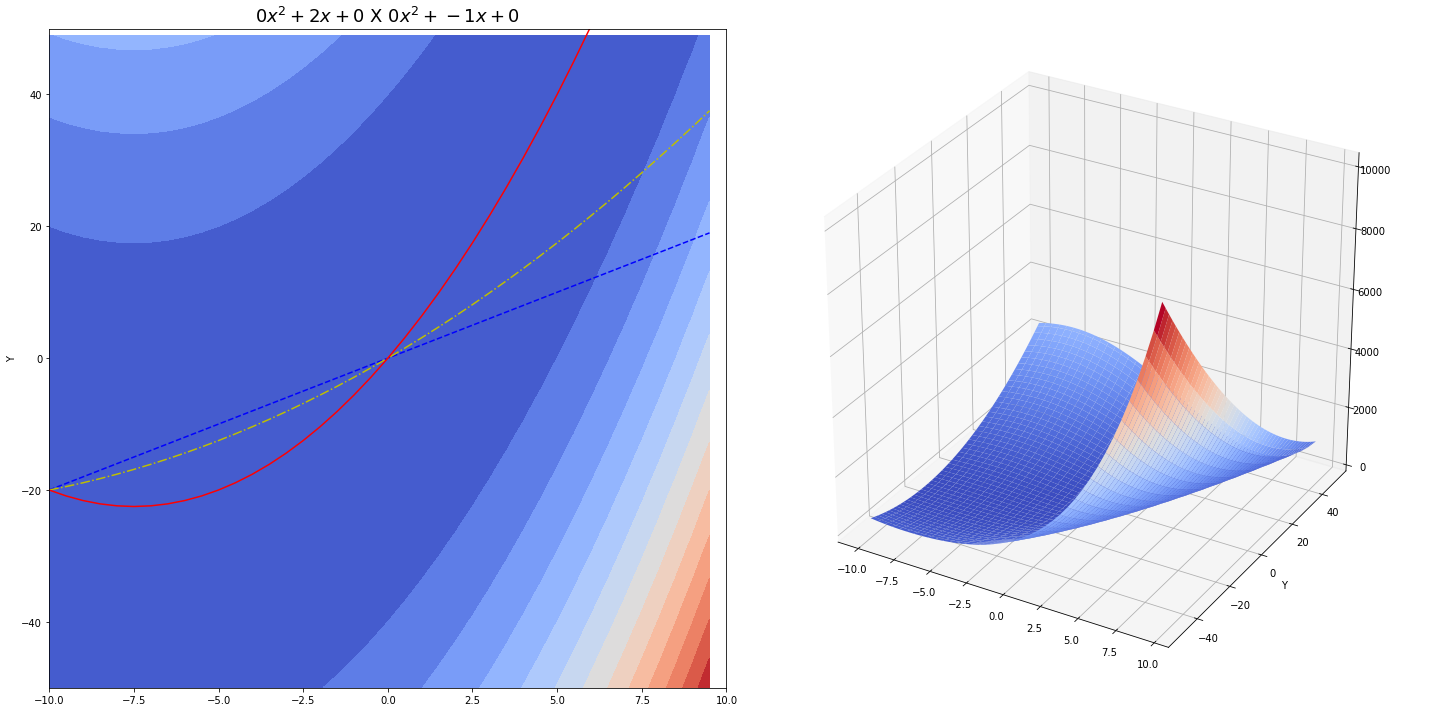

In [154]:
def y(a,b,c):
    def res(x):
        r = a*x**2 + b*x + c    
        return r
    return res

def quadratic_formula(a,b,c):
    return str(a)+"x^2"+"+"+str(b)+"x+"+str(c)

def two_quadratic_formulas(a1,b1,c1,a2,b2,c2):
    return "$"+quadratic_formula(a1,b1,c1)+"$ X $"+quadratic_formula(a2,b2,c2)+"$"

y1 = y(0,2,0)
y2 = y(0.1,3,0)
plot2_superp(y1,y2,two_quadratic_formulas(0,2,0,0,-1,0))

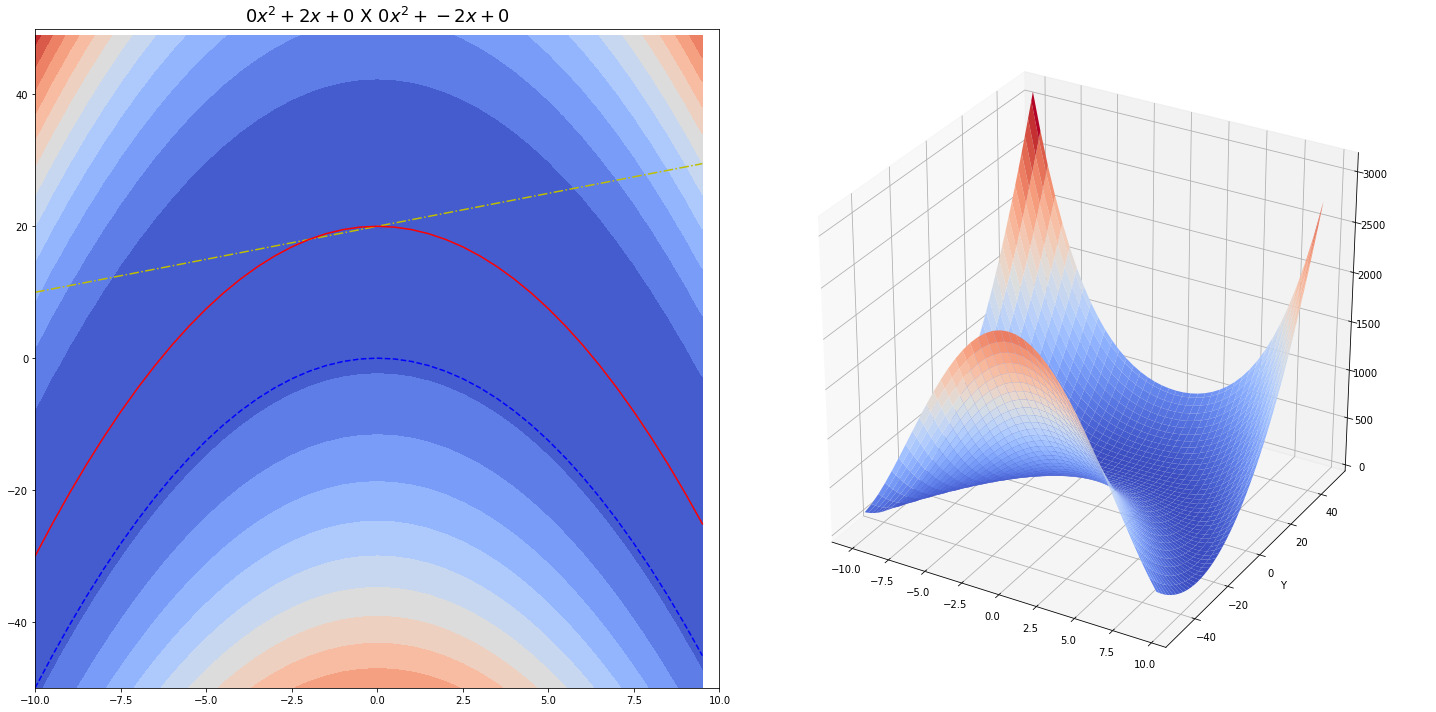

In [83]:
y1 = y(-.5,0,0)
y2 = y(0,1,20)
plot2_superp(y1,y2,two_quadratic_formulas(0,2,0,0,-2,0))

In [286]:
?plt.plot

In [332]:
?plt.Axes.set_title